In [1]:
import tensorflow as tf
from keras import datasets
import pandas as pd
import tensorflow
import os
import cv2
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization , LeakyReLU , MaxPool2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import activations
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
sign_count=[]
for i in range(10):
    sign_count.append(0)
    for j in range(len(y_train)):
        if(i == y_train[j]):
            sign_count[i]+=1
print("max :",max(sign_count))
print("min :",min(sign_count))

max : 5000
min : 5000


In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
X_train = X_train.astype('float32')
x_test = x_test.astype('float32')
X_val = X_val.astype('float32')
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [5]:
#normalize
X_train = X_train/255
X_val = X_val/255
x_test = x_test/255

In [7]:
#gray and normalize
arr3 = []
for i in X_train:
  pic = cv2.cvtColor(i , cv2.COLOR_RGB2GRAY)
  eq = cv2.equalizeHist(np.uint8(pic))
  arr3.append(eq.reshape(32,32,1))
  
X_train = np.array(arr3)  
X_train = X_train / 255.0

In [8]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,zoom_range = 0.1, horizontal_flip=True,rotation_range=20)
training_data = datagen.flow(X_train,y_train)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.005, momentum=0.9)
adam= tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1 , patience=7)

history = model.fit(training_data , batch_size=128 , epochs=100 , validation_data=(X_val,y_val) , callbacks = [es])

Epoch 1/100
1250/1250 [==============================] - 42s 28ms/step - loss: 1.8019 - accuracy: 0.3762 - val_loss: 1.4215 - val_accuracy: 0.4977
Epoch 2/100
1250/1250 [==============================] - 36s 29ms/step - loss: 1.3346 - accuracy: 0.5196 - val_loss: 1.2914 - val_accuracy: 0.5504
Epoch 3/100
1250/1250 [==============================] - 36s 29ms/step - loss: 1.1675 - accuracy: 0.5871 - val_loss: 1.2638 - val_accuracy: 0.5938
Epoch 4/100
1250/1250 [==============================] - 36s 29ms/step - loss: 1.0489 - accuracy: 0.6352 - val_loss: 0.7839 - val_accuracy: 0.7229
Epoch 5/100
1250/1250 [==============================] - 36s 29ms/step - loss: 0.9789 - accuracy: 0.6582 - val_loss: 1.0443 - val_accuracy: 0.6559
Epoch 6/100
1250/1250 [==============================] - 35s 28ms/step - loss: 0.9097 - accuracy: 0.6858 - val_loss: 0.8911 - val_accuracy: 0.6881
Epoch 7/100
1250/1250 [==============================] - 36s 28ms/step - loss: 0.8764 - accuracy: 0.7021 - val_loss: 0

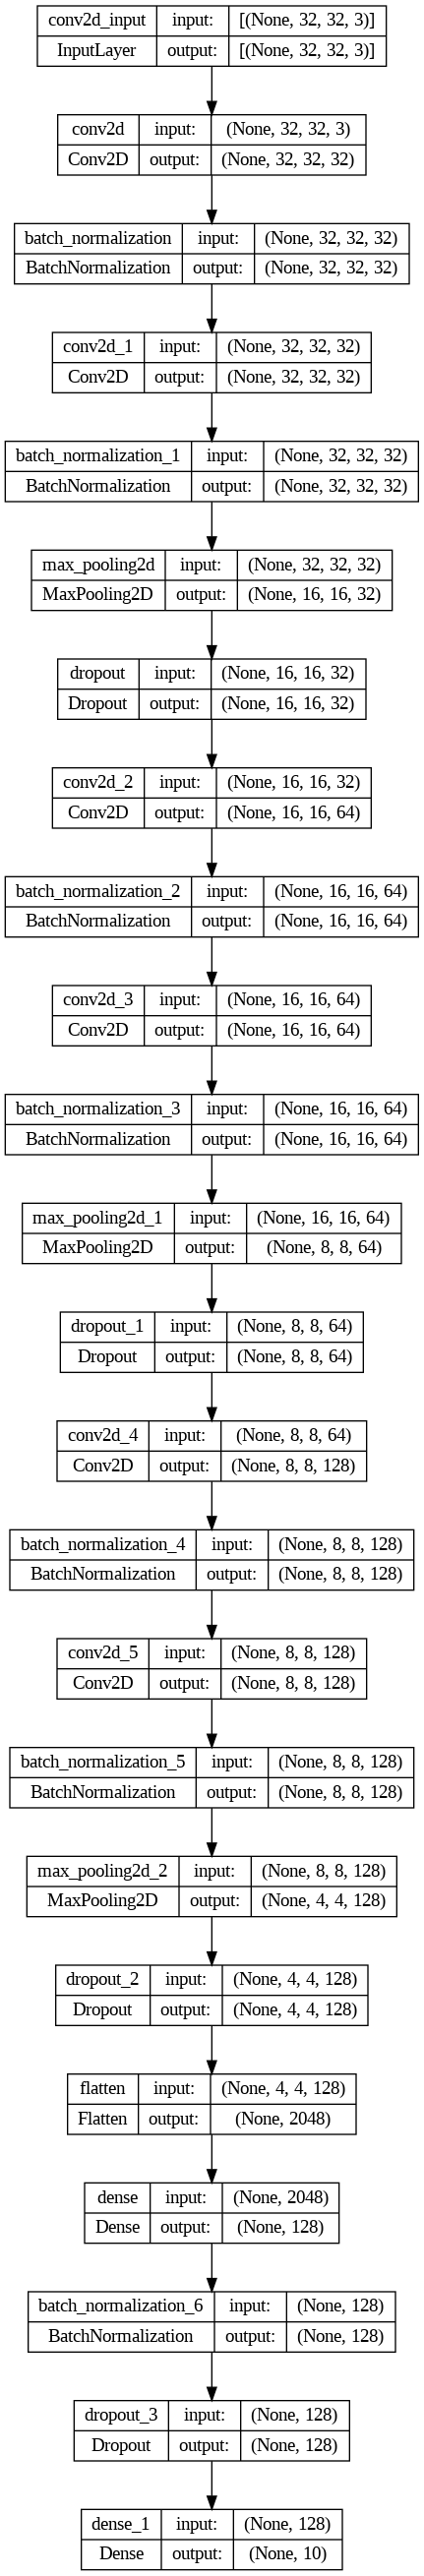

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

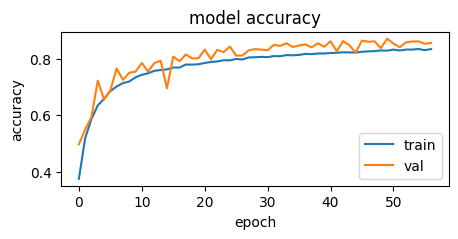

In [10]:
plt.figure(figsize = (5,2))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

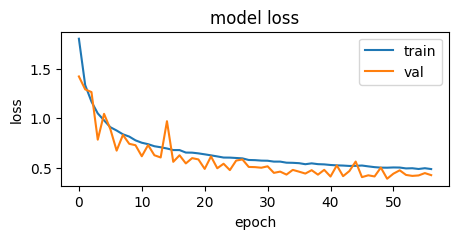

In [11]:
plt.figure(figsize = (5,2))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [12]:
y_predection = model.predict(x_test)
prediction = np.argmax(y_predection, axis=1)
print(prediction)

313/313 [==============================] - 1s 3ms/step
[3 8 8 ... 5 1 7]


In [13]:
finalperdict = metrics.accuracy_score(y_test, prediction)
round(finalperdict*100,2)

85.17